<a href="https://colab.research.google.com/github/Yarin-Shohat/Data-Analyst/blob/main/Diamonds_and_FIFA_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DataBase download from:**

Diamonds: https://www.kaggle.com/datasets/shivam2503/diamonds

EA SPORTS FC 24 FULL PLAYERS DATABASE AND STATS: https://www.kaggle.com/datasets/nyagami/fc-24-players-database-and-stats-from-easports?select=male_players.csv

In [ ]:
seed = 421485109
Diamonds_Path = './datasets/diamonds/diamonds.csv'
FIFA_Path = './datasets/fifa24/male_players.csv'

import random
random.seed(seed)

# **Question 1**



# import kaggle database

In [ ]:
import json
import os

# Installing the Kaggle package
!pip install kaggle

!mkdir /root/.kaggle/

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
api_token = {"username":"xxx_USER_xxx","key":"xxx_KEY_xxx"}


# creating kaggle.json file with the personal API-Key details
# You can also put this file on your Google Drive
with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json|

/bin/bash: -c: line 2: syntax error: unexpected end of file


In [ ]:
# Creating a dataset directory
!mkdir ./datasets/
!mkdir ./datasets/diamonds

# download the dataset from Kaggle and unzip it
!kaggle datasets download shivam2503/diamonds -p ./datasets/diamonds/
!unzip ./datasets/diamonds/*.zip  -d ./datasets/diamonds/

100% 733k/733k [00:00<00:00, 1.58MB/s]
100% 733k/733k [00:00<00:00, 1.58MB/s]
Archive:  ./datasets/diamonds/diamonds.zip
  inflating: ./datasets/diamonds/diamonds.csv  


In [ ]:
import pandas as pd

df = pd.read_csv(Diamonds_Path)

# 0 - Chack the database


In [ ]:
df.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
clarity_counts = df['clarity'].value_counts()
clarity_counts

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [ ]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**now we see the df is clean (no null) and the 'clarity' col is understood**

# 1 - Making KNN model (k=3)

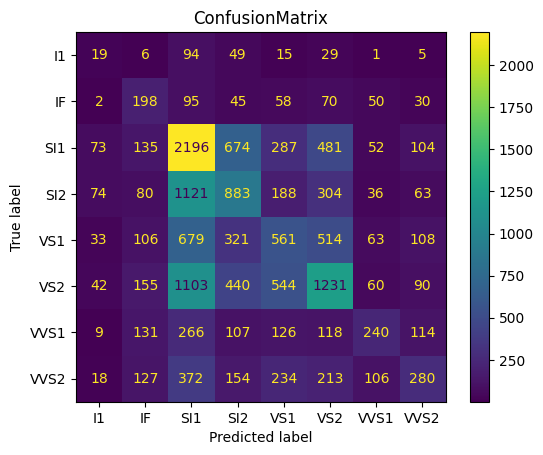

In [ ]:
######## STEP 0 - prepare
# imports
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


######## STEP 1 - split the df to train and test (70/30)
X_1 = df[['x', 'y', 'carat', 'depth', 'price', 'table']]
y_1 = df['clarity']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1,test_size=0.3,random_state=seed)



######## STEP 2 - build the KNN model and train it
knn_model_1 = KNeighborsClassifier(n_neighbors=3)
knn_model_1.fit(X_train_1, y_train_1)



######## STEP 3 - prodicting 'clarity' with test
y_pred_1 = knn_model_1.predict(X_test_1)



######## STEP 4 - test the prediction
cm_1 = confusion_matrix(y_test_1, y_pred_1)



######## STEP 5 - visualization
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1,display_labels=knn_model_1.classes_)
disp_1.plot()
plt.title('ConfusionMatrix')
plt.show()

now we chack the accurancy and F1 score

In [ ]:
######## STEP 6 - accurancy and F1
from sklearn.metrics import accuracy_score, f1_score

accuracy_1 = accuracy_score(y_test_1, y_pred_1)
f1_macro_1 = f1_score(y_test_1, y_pred_1, average='macro')
print(f"Accuracy: {accuracy_1:f}")
print(f"F1 Score (Macro): {f1_macro_1:f}")


Accuracy: 0.346558
F1 Score (Macro): 0.282764


# 2 - Making KNN model (k=5, manhetten)

as we see at the df chacking (in the start) we need to **encode cols 'cut' and 'color'** to use then in KNN model

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['cut'] = label_encoder.fit_transform(df['cut'])
df['color'] = label_encoder.fit_transform(df['color'])


now we can build KNN model with all the cols, also now **K=5** and **matric=manhattan**

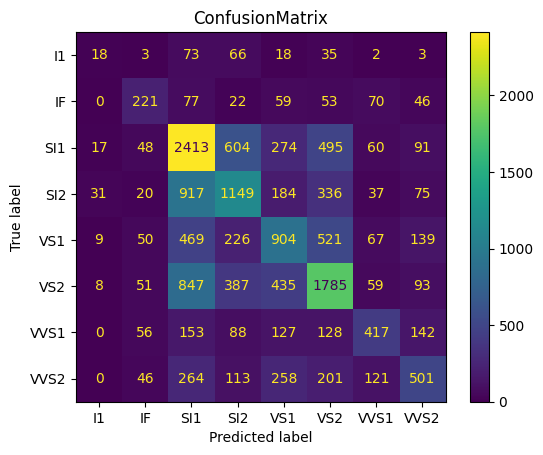

In [ ]:
######## STEP 0 - prepare
# imports
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


######## STEP 1 - split the df to train and test (70/30)
X_2 = df[['x', 'y', 'carat', 'depth', 'price', 'table', 'cut', 'color']]
y_2 = df['clarity']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2,y_2,test_size=0.3,random_state=seed)



######## STEP 2 - build the KNN model and train it
knn_model_2 = KNeighborsClassifier(n_neighbors=5, metric='manhattan')
knn_model_2.fit(X_train_2, y_train_2)



######## STEP 3 - prodicting 'clarity' with test
y_pred_2 = knn_model_2.predict(X_test_2)



######## STEP 4 - test the prediction
cm_2 = confusion_matrix(y_test_2, y_pred_2)



######## STEP 5 - visualization
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2,display_labels=knn_model_2.classes_)
disp_2.plot()
plt.title('ConfusionMatrix')
plt.show()

In [ ]:
######## STEP 6 - accurancy and F1
from sklearn.metrics import accuracy_score, f1_score

accuracy_2 = accuracy_score(y_test_2, y_pred_2)
f1_macro_2 = f1_score(y_test_2, y_pred_2, average='macro')
print(f"Accuracy: {accuracy_2:f}")
print(f"F1 Score (Macro): {f1_macro_2:f}")

Accuracy: 0.457793
F1 Score (Macro): 0.398933


we can see **improve it the accurancy** and F1 score after we add featurs to the model and change the K to be 5 and using manhattan distance

# 3 - Plot the differences

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function To calculate Accuracy of KNN Model 1
#   Input: x_train, y_train, x_test, y_test
#   Output: float - Accuracy
def Model1_Accuracy(x_train, y_train, x_test, y_test) -> float:
  # Start the KNN algorithm
  knn_model= KNeighborsClassifier(n_neighbors=3)
  knn_model.fit(x_train, y_train)
  # Predict the clarity
  y_pred = knn_model.predict(x_test)
  return accuracy_score(y_test, y_pred)

# Function To calculate F1 of KNN Model 1
#   Input: x_train, y_train, x_test, y_test
#   Output: float - F1
def Model1_F1(x_train, y_train, x_test, y_test) -> float:
  # Start the KNN algorithm
  knn_model= KNeighborsClassifier(n_neighbors=3)
  knn_model.fit(x_train, y_train)
  # Predict the clarity
  y_pred = knn_model.predict(x_test)
  return f1_score(y_test, y_pred, average='macro')

# Function To calculate Accuracy of KNN Model 2
#   Input: x_train, y_train, x_test, y_test
#   Output: float - Accuracy
def Model2_Accuracy(x_train, y_train, x_test, y_test) -> float:
  # Start the KNN algorithm
  knn_model= KNeighborsClassifier(n_neighbors=5, metric='manhattan')
  knn_model.fit(x_train, y_train)
  # Predict the clarity
  y_pred = knn_model.predict(x_test)
  return accuracy_score(y_test, y_pred)

# Function To calculate F1 of KNN Model 2
#   Input: x_train, y_train, x_test, y_test
#   Output: float - F1
def Model2_F1(x_train, y_train, x_test, y_test) -> float:
  # Start the KNN algorithm
  knn_model= KNeighborsClassifier(n_neighbors=5, metric='manhattan')
  knn_model.fit(x_train, y_train)
  # Predict the clarity
  y_pred = knn_model.predict(x_test)
  return f1_score(y_test, y_pred, average='macro')

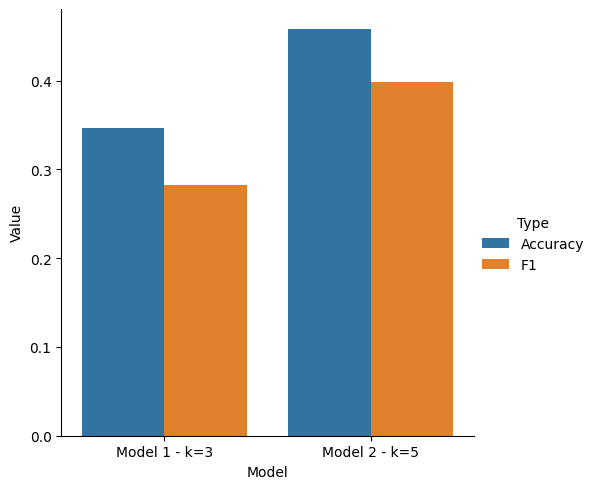

In [ ]:
# Insert last questions data to array
data = [['Accuracy', 'Model 1 - k=3', Model1_Accuracy(X_train_1, y_train_1, X_test_1, y_test_1)],
['F1', 'Model 1 - k=3', Model1_F1(X_train_1, y_train_1, X_test_1, y_test_1)],
['Accuracy', 'Model 2 - k=5', Model2_Accuracy(X_train_2, y_train_2, X_test_2, y_test_2)],
['F1',  'Model 2 - k=5', Model2_F1(X_train_2, y_train_2, X_test_2, y_test_2)],]

df_q1_3 = pd.DataFrame(data, columns=['Type', 'Model', 'Value'])
sns.catplot(df_q1_3, kind='bar', x='Model', y='Value', hue='Type')

# **Question 2**

# import kaggle database

In [ ]:
# Creating a dataset directory
!mkdir ./datasets/
!mkdir ./datasets/fifa24

# download the dataset from Kaggle and unzip it
!kaggle datasets download -d nyagami/fc-24-players-database-and-stats-from-easports -p ./datasets/fifa24/
!unzip ./datasets/fifa24/*.zip  -d ./datasets/fifa24/

mkdir: cannot create directory ‘./datasets/’: File exists
100% 2.55M/2.55M [00:00<00:00, 5.12MB/s]
100% 2.55M/2.55M [00:00<00:00, 4.35MB/s]
Archive:  ./datasets/fifa24/fc-24-players-database-and-stats-from-easports.zip
  inflating: ./datasets/fifa24/all_players.csv  
  inflating: ./datasets/fifa24/female_players.csv  
  inflating: ./datasets/fifa24/male_players.csv  


In [ ]:
import pandas as pd

df2 = pd.read_csv(FIFA_Path)

# 1 - Preprocessing the database

In [ ]:
df2.head(5)

,Unnamed: 0,Name,Nation,Club,Position,Age,Overall,Pace,Shooting,Passing,...,Strength,Aggression,Att work rate,Def work rate,Preferred foot,Weak foot,Skill moves,URL,Gender,GK
0,0,Kylian Mbappé,France,Paris SG,ST,24,91,97,90,80,...,77,64,High,Low,Right,4,5,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
1,1,Erling Haaland,Norway,Manchester City,ST,23,91,89,93,66,...,93,87,High,Medium,Left,3,3,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
2,2,Kevin De Bruyne,Belgium,Manchester City,CM,32,91,72,88,94,...,74,75,High,Medium,Right,5,4,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
3,3,Lionel Messi,Argentina,Inter Miami CF,CF,36,90,80,87,90,...,68,44,Low,Low,Left,4,4,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN
4,4,Karim Benzema,France,Al Ittihad,CF,35,90,79,88,83,...,82,63,Medium,Medium,Right,4,4,https://www.ea.com/games/ea-sports-fc/ratings/...,M,NaN


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15845 entries, 0 to 15844
Data columns (total 47 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      15845 non-null  int64  
 1   Name            15845 non-null  object 
 2   Nation          15845 non-null  object 
 3   Club            15845 non-null  object 
 4   Position        15845 non-null  object 
 5   Age             15845 non-null  int64  
 6   Overall         15845 non-null  int64  
 7   Pace            15845 non-null  int64  
 8   Shooting        15845 non-null  int64  
 9   Passing         15845 non-null  int64  
 10  Dribbling       15845 non-null  int64  
 11  Defending       15845 non-null  int64  
 12  Physicality     15845 non-null  int64  
 13  Acceleration    15845 non-null  int64  
 14  Sprint          15845 non-null  int64  
 15  Positioning     15845 non-null  int64  
 16  Finishing       15845 non-null  int64  
 17  Shot            15845 non-null 

In [ ]:
df2.isnull().sum()

Unnamed: 0            0
Name                  0
Nation                0
Club                  0
Position              0
Age                   0
Overall               0
Pace                  0
Shooting              0
Passing               0
Dribbling             0
Defending             0
Physicality           0
Acceleration          0
Sprint                0
Positioning           0
Finishing             0
Shot                  0
Long                  0
Volleys               0
Penalties             0
Vision                0
Crossing              0
Free                  0
Curve                 0
Agility               0
Balance               0
Reactions             0
Ball                  0
Composure             0
Interceptions         0
Heading               0
Def                   0
Standing              0
Sliding               0
Jumping               0
Stamina               0
Strength              0
Aggression            0
Att work rate         0
Def work rate         0
Preferred foot  

**Predict:**
*   'Position' -> **need to ENCODE**

**Identities:**
*   'Unnamed' (index) -> **NO need**
*   'Name' -> **IGNORE** (not put on scale but use in question 7)
*   'Age' -> **NO need**
*   'URL' -> **NO need**
*   'Gender' -> **NO need** (all male)

**Categorias:**
*   'Nation' -> **need to ENCODE**
*   'Club' -> **need to ENCODE**

**Performence:**
*   6-38, 42-43 -> **GOOD**
*   39-41 -> **need to ENCODE**

**None**
*   'GK' -> **need to ENCODE** (it can first idendity how is GK)


1. Position: we group for 4 groups:
*   GK -> **GK**
*   CB, LB, RB, LWB, RWB -> **DEF**
*   CM, LM, RM, CDM, CAM -> **MID**
*   ST, CF, RF, LF, LW, RW -> **ATT**



In [ ]:
def map_position(position):
    if position == 'GK':
        return 'GK'
    elif position in ['CB', 'LB', 'RB', 'LWB', 'RWB']:
        return 'DEF'
    elif position in ['CM', 'LM', 'RM', 'CDM', 'CAM']:
        return 'MID'
    elif position in ['ST', 'CF', 'RF', 'LF', 'LW', 'RW']:
        return 'ATT'
    else:
        return 'NONE'

df2['PosCat'] = df2['Position'].map(map_position)

2. Drop unusfull Identities cols:
*   'Unnamed' (index)
*   'Age'
*   'URL'
*   'Gender'



In [ ]:
cols_to_drop = ['Age', 'URL', 'Gender', 'Unnamed: 0']
df2 = df2.drop(cols_to_drop, axis=1)

3. Encoding cols:
*   'GK' (by loop beacouse has null values)
*   'Att work rate'
*   'Def work rate'
*   'Preferred foot'
*   'Position'
*   'Nation'
*   'Club'


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df2['Att work rate'] = label_encoder.fit_transform(df2['Att work rate'])
df2['Def work rate'] = label_encoder.fit_transform(df2['Def work rate'])
df2['Preferred foot'] = label_encoder.fit_transform(df2['Preferred foot'])
df2['Position'] = label_encoder.fit_transform(df2['Position'])

df2['GK'].fillna(0, inplace = True) # easier becous null values
df2.loc[df2['GK'] > 0, 'GK'] = 1

# also encode catagorial cols
df2['Nation'] = label_encoder.fit_transform(df2['Nation'])
df2['Club'] = label_encoder.fit_transform(df2['Club'])


4. Normalization to all cols- to make the acc higher



In [ ]:
# make list of all cols exept 'Name' and 'posCat'
column_list = df2.columns.tolist()
column_list.remove('Name')
column_list.remove('PosCat')

# normalization the cols
cols = ['Nation', 'Club', 'Overall', 'Pace', 'Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality', 'Acceleration', 'Sprint', 'Positioning', 'Finishing', 'Shot', 'Long', 'Volleys', 'Penalties', 'Vision', 'Crossing', 'Free', 'Curve', 'Agility', 'Balance', 'Reactions', 'Ball', 'Composure', 'Interceptions', 'Heading', 'Def', 'Standing', 'Sliding', 'Jumping', 'Stamina', 'Strength', 'Aggression', 'Weak foot', 'Skill moves']
for col in cols:
  df2[col] = df2[col]/df2[col].max()

5. check the database after the preprocessing

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15845 entries, 0 to 15844
Data columns (total 44 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name            15845 non-null  object 
 1   Nation          15845 non-null  float64
 2   Club            15845 non-null  float64
 3   Position        15845 non-null  int64  
 4   Overall         15845 non-null  float64
 5   Pace            15845 non-null  float64
 6   Shooting        15845 non-null  float64
 7   Passing         15845 non-null  float64
 8   Dribbling       15845 non-null  float64
 9   Defending       15845 non-null  float64
 10  Physicality     15845 non-null  float64
 11  Acceleration    15845 non-null  float64
 12  Sprint          15845 non-null  float64
 13  Positioning     15845 non-null  float64
 14  Finishing       15845 non-null  float64
 15  Shot            15845 non-null  float64
 16  Long            15845 non-null  float64
 17  Volleys         15845 non-null 

In [ ]:
df2.head(8)

,Name,Nation,Club,Position,Overall,Pace,Shooting,Passing,Dribbling,Defending,...,Stamina,Strength,Aggression,Att work rate,Def work rate,Preferred foot,Weak foot,Skill moves,GK,PosCat
0,Kylian Mbappé,0.324675,0.643185,14,1.000000,1.000000,0.967742,0.851064,0.968750,0.404494,...,0.926316,0.802083,0.673684,0,1,1,0.8,1.0,0.0,ATT
1,Erling Haaland,0.694805,0.554364,14,1.000000,0.917526,1.000000,0.702128,0.822917,0.505618,...,0.800000,0.968750,0.915789,0,2,0,0.6,0.6,0.0,ATT
2,Kevin De Bruyne,0.071429,0.554364,4,1.000000,0.742268,0.946237,1.000000,0.895833,0.730337,...,0.926316,0.770833,0.789474,0,2,1,1.0,0.8,0.0,MID
3,Lionel Messi,0.032468,0.471669,3,0.989011,0.824742,0.935484,0.957447,1.000000,0.370787,...,0.736842,0.708333,0.463158,1,1,0,0.8,0.8,0.0,ATT
4,Karim Benzema,0.324675,0.045942,3,0.989011,0.814433,0.946237,0.882979,0.906250,0.438202,...,0.863158,0.854167,0.663158,2,2,1,0.8,0.8,0.0,ATT
5,Thibaut Courtois,0.071429,0.719755,5,0.989011,0.876289,0.956989,0.808511,0.135417,0.516854,...,0.400000,0.729167,0.242105,2,2,0,0.6,0.2,1.0,GK
6,Harry Kane,0.285714,0.303216,14,0.989011,0.711340,1.000000,0.893617,0.854167,0.550562,...,0.873684,0.875000,0.842105,0,0,1,1.0,0.6,0.0,ATT
7,Robert Lewandowski,0.740260,0.300153,14,0.989011,0.773196,0.978495,0.851064,0.895833,0.494382,...,0.800000,0.927083,0.852632,0,2,1,0.8,0.8,0.0,ATT


# 2 - split the df to train and test (80/20)

In [ ]:
from sklearn.model_selection import train_test_split

# drop columns
cols_to_drop = ['Name', 'PosCat']
X = df2.drop(cols_to_drop, axis=1)
y = df2['PosCat']

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)


# 3 - Decision trees in different depths (3, 5) without a position column

In [ ]:
######## STEP 0 - imports
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np



######## STEP 1 - WITHOUT 'Position' col
X_train_3 = X_train.drop(['Position'], axis=1)
X_test_3 = X_test.drop(['Position'], axis=1)

# feature names list for feature_importances_
feature_names=list(X_train_3.columns.values)



######## STEP 2 - Build and training the Desition Tree
for depth in [3, 5]:
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(X_train_3, y_train)

  # Training Accuracy
  train_accuracy = accuracy_score(y_train, dt.predict(X_train_3))

  # ROC-AUC
  y_probs = dt.predict_proba(X_train_3)
  roc_auc = roc_auc_score(y_train, y_probs, multi_class='ovr')  # Assuming multi-class problem

  # F1
  f1_per_class = f1_score(y_train, dt.predict(X_train_3), average='weighted')

  # Recall
  recall_per_class = recall_score(y_train, dt.predict(X_train_3), average='weighted')


  # Prints
  print(f"Depth: {depth}")
  print(f"Training Accuracy: {train_accuracy:f}")
  print(f"F1 Score: {f1_per_class:f}")
  print(f"Recall: {recall_per_class:f}")
  print(f"ROC-AUC: {roc_auc:f}")
  print("\n")

Depth: 3
Training Accuracy: 0.747081
F1 Score: 0.743184
Recall: 0.747081
ROC-AUC: 0.908652


Depth: 5
Training Accuracy: 0.821947
F1 Score: 0.822075
Recall: 0.821947
ROC-AUC: 0.951258




# 4 - Decision trees (in max depths 5) with a position column

In [ ]:
######## STEP 1 - WITH 'Position' col
# 'X_train' is with position (from part 3)
# 'X_test' is with position (from part 3)

# feature names list for feature_importances_
feature_names_2=list(X_train.columns.values)



######## STEP 2 - Decision Tree with max depth 5
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

# Training Accuracy
train_accuracy = accuracy_score(y_train, dt.predict(X_train))

# ROC-AUC
y_probs = dt.predict_proba(X_train)
roc_auc = roc_auc_score(y_train, y_probs, multi_class='ovr')  # Assuming multi-class problem

# F1
f1_per_class = f1_score(y_train, dt.predict(X_train), average='weighted')

# Recall
recall_per_class = recall_score(y_train, dt.predict(X_train), average='weighted')


# Prints
print(f"Depth: 5")
print(f"Training Accuracy: {train_accuracy:f}")
print(f"F1 Score: {f1_per_class:f}")
print(f"Recall: {recall_per_class:f}")
print(f"ROC-AUC: {roc_auc:f}")
print("\n")

Depth: 5
Training Accuracy: 0.911723
F1 Score: 0.912391
Recall: 0.911723
ROC-AUC: 0.980711




We can see that the **accuracy indices have improved** and the reason is that we included the player's **position** in the model - so it is clear that his playing category will be more accurate given his playing position


# 5 - vizualization of the Desition Tree

we show the tree in depth 5 because we want to avoid over-fitting

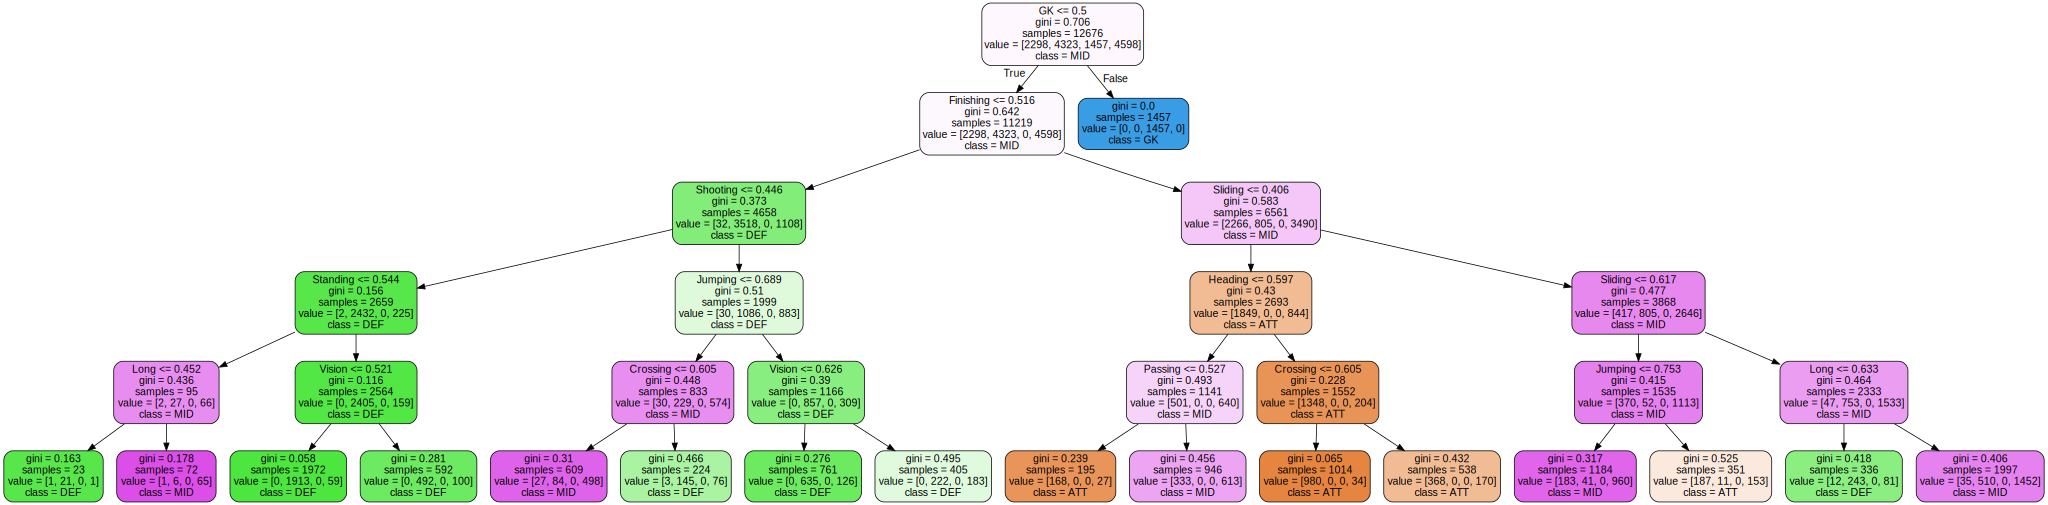

In [ ]:
from graphviz import Source
from sklearn import tree


tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train_3, y_train)
Source(tree.export_graphviz(tree_clf,
                            out_file=None,
                            feature_names=list(X_train_3.columns.values),
                            class_names = tree_clf.classes_,
                            filled = True,
                            rounded = True))

#6 - Top 10 Fetures

first lets check for each Feature it importance:

In [ ]:
######## STEP 0 - imports
from sklearn.tree import DecisionTreeClassifier
import numpy as np


######## STEP 1 - WITHOUT 'Position' col
X_train_5 = X_train.drop(['Position'], axis=1)
X_test_5 = X_test.drop(['Position'], axis=1)

# feature names list for feature_importances_
feature_names=list(X_train_5.columns.values)

######## STEP 2 - Build and training the Desition Tree
for depth in [3, 5]:
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(X_train_5, y_train)
  f_dict = {}

  # Feature Importance
  importance = dt.feature_importances_

  # add feture to dict
  for feature_i,feature_importance in enumerate(importance):
    if feature_importance > 0:
      f_dict[feature_i] = feature_importance

  sorted_f_dict = {k: v for k, v in sorted(f_dict.items(), key=lambda item: item[1], reverse=True)}

  # Prints
  print(f"Depth: {depth}")
  print("Sorted Features:")
  num = 1
  for feature_i, score in sorted_f_dict.items():
    if num <= 10:
      print(f"    {num}. Feature: {feature_names[feature_i]}, Score: {round(score, 4)}")
      num += 1

  print("\n")


Depth: 3
Sorted Features:
    1. Feature: Skill moves, Score: 0.3883
    2. Feature: Finishing, Score: 0.363
    3. Feature: Sliding, Score: 0.1815
    4. Feature: Shooting, Score: 0.0672


Depth: 5
Sorted Features:
    1. Feature: Skill moves, Score: 0.3094
    2. Feature: Finishing, Score: 0.2893
    3. Feature: Sliding, Score: 0.167
    4. Feature: Shooting, Score: 0.0535
    5. Feature: Jumping, Score: 0.0473
    6. Feature: Heading, Score: 0.0428
    7. Feature: Long, Score: 0.0275
    8. Feature: Crossing, Score: 0.0241
    9. Feature: Passing, Score: 0.0148
    10. Feature: Standing, Score: 0.0134




# 6 A



we can see the **top 6** features is
1. Feature: GK
2. Feature: Finishing
3. Feature: Sliding
4. Feature: Shooting
5. Feature: Jumping
6. Feature: Heading
7. Feature: Long
8. Feature: Crossing
9. Feature: Passing
10. Feature: Standing


so now let use only those Top-10 features.

**Probably those 10 features have more dominantic differents between the different positions.**

In [ ]:
######## STEP 0 - imports
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np



######## STEP 1 - Top-10 features
selected_features = ['GK', 'Finishing', 'Sliding', 'Shooting', 'Heading', 'Jumping', 'Crossing', 'Long', 'Passing', 'Standing']

X_train_10 = X_train[selected_features]
X_test_10 = X_test[selected_features]

# feature names list for feature_importances_
feature_names = list(X_train_10.columns.values)

######## STEP 2 - Build and training the Decision Tree
for depth in [3, 5]:
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(X_train_10, y_train)

  # Training Accuracy
  train_accuracy = accuracy_score(y_train, dt.predict(X_train_10))

  # ROC-AUC
  y_probs = dt.predict_proba(X_train_10)
  roc_auc = roc_auc_score(y_train, y_probs, multi_class='ovr')  # Assuming multi-class problem

  # F1
  f1_per_class = f1_score(y_train, dt.predict(X_train_10), average='weighted')

  # Recall
  recall_per_class = recall_score(y_train, dt.predict(X_train_10), average='weighted')


  # Prints
  print(f"Depth: {depth}")
  print(f"Training Accuracy: {train_accuracy:f}")
  print(f"F1 Score: {f1_per_class:f}")
  print(f"Recall: {recall_per_class:f}")
  print(f"ROC-AUC: {roc_auc:f}")
  print("\n")

Depth: 3
Training Accuracy: 0.747081
F1 Score: 0.743184
Recall: 0.747081
ROC-AUC: 0.908652


Depth: 5
Training Accuracy: 0.821947
F1 Score: 0.822075
Recall: 0.821947
ROC-AUC: 0.951272




# 6 B


We want to make Trash-hold that make the model not over fitting

So lets let the **Trash-hold to be 0.05** becouse it keep us with GK, Finishing, Sliding and Shooting. this is the minimum requid number of feature according the classes (GK, MID, DEF, ATT)



In [ ]:
######## STEP 0 - imports
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np



######## STEP 1 - Top-10 features
selected_features = ['GK', 'Finishing', 'Sliding', 'Shooting']

X_train_TH = X_train[selected_features]
X_test_TH = X_test[selected_features]

# feature names list for feature_importances_
feature_names = list(X_train_TH.columns.values)

######## STEP 2 - Build and training the Decision Tree
for depth in [3, 5]:
  dt = DecisionTreeClassifier(max_depth=depth)
  dt.fit(X_train_TH, y_train)

  # Training Accuracy
  train_accuracy = accuracy_score(y_train, dt.predict(X_train_TH))

  # ROC-AUC
  y_probs = dt.predict_proba(X_train_TH)
  roc_auc = roc_auc_score(y_train, y_probs, multi_class='ovr')  # Assuming multi-class problem

  # F1
  f1_per_class = f1_score(y_train, dt.predict(X_train_TH), average='weighted')

  # Recall
  recall_per_class = recall_score(y_train, dt.predict(X_train_TH), average='weighted')


  # Prints
  print(f"Depth: {depth}")
  print(f"Training Accuracy: {train_accuracy:f}")
  print(f"F1 Score: {f1_per_class:f}")
  print(f"Recall: {recall_per_class:f}")
  print(f"ROC-AUC: {roc_auc:f}")
  print("\n")


Depth: 3
Training Accuracy: 0.747081
F1 Score: 0.743184
Recall: 0.747081
ROC-AUC: 0.908652


Depth: 5
Training Accuracy: 0.778242
F1 Score: 0.778908
Recall: 0.778242
ROC-AUC: 0.939142




# 7 - Test the model with random 5 players

let choose desition tree in depth 7 (because it have max acc) and test it with rando 5 player from range 1-1000

In [ ]:
import numpy as np

# set a random seed for reproducibility
np.random.seed(seed)

# randomly select 5 player indices from the range 1-1000
random_player_indices = np.random.choice(1000, size=5, replace=False)

# extract features for the selected players
X_selected_players = X_test.drop(['Position'], axis=1).iloc[random_player_indices]

# predictions
X_train_3 = X_train.drop(['Position'], axis=1)
X_test_3 = X_test.drop(['Position'], axis=1)

dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train_3, y_train)

y_predictions = dt.predict(X_selected_players)

# Extract real names and positions from df3
selected_players_info = df2.iloc[random_player_indices][['Name', 'PosCat']]


# Display the selected player indices, real names, positions, and predictions
for player_index, (name, position), prediction in zip(random_player_indices, selected_players_info.itertuples(index=False), y_predictions):
    print(f"Player Index: {player_index}, Name: {name}, Position: {position}, Predicted Class: {prediction}")


Player Index: 974, Name: Orbelín Pineda, Position: MID, Predicted Class: ATT
Player Index: 364, Name: Pierre-Emerick Aubameyang, Position: ATT, Predicted Class: ATT
Player Index: 413, Name: Matheus, Position: GK, Predicted Class: DEF
Player Index: 601, Name: Khéphren Thuram, Position: MID, Predicted Class: ATT
Player Index: 30, Name: Marquinhos, Position: DEF, Predicted Class: MID


You can see that our tree was only 20% correct


We will examine the visualization of the tree again to see the PATH it goes through

In [ ]:
from graphviz import Source
from sklearn import tree


tree_clf = DecisionTreeClassifier(max_depth=5)
tree_clf.fit(X_train_3, y_train)
Source(tree.export_graphviz(tree_clf,
                            out_file=None,
                            feature_names=list(X_train_3.columns.values),
                            class_names = tree_clf.classes_,
                            filled = True,
                            rounded = True))

# conclusion

**He did find different roles, but because of the grouping by areas (posCat) and not by exact positions, so our tree is considered successful because it approached positions by areas that may have similar data.**

# 8 - GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
    'criterion': ['gini', 'entropy'],
    'max_features': ['auto', 'sqrt', 'log2'],
    'class_weight': ['balanced'],
    'splitter': ['best', 'random']
}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

# Fit GridSearchCV
grid_search.fit(X_train_3, y_train)

# Access Results
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
best_model.fit(X_train_3, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 11, 'max_features': 'sqrt', 'splitter': 'best'}
Best Score: 0.8239980649456505


DecisionTreeClassifier(class_weight='balanced', max_depth=11,
                       max_features='sqrt')

**We got that the best features for DecisionTreeClassifier are:**

*   class_weight: 'balanced'
*   criterion: 'gini'
*   max_depth: 11
*   max_features: 'sqrt'
*   splitter: 'best'

Best Score: 0.8239980649456505

